In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
df= pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [172]:
df.isnull().sum()*100/614

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [173]:
cat=[]
num=[]

In [174]:
for i in df:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [175]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [176]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [177]:
for i in df.columns:
    if df[i].dtype == 'object':
        df.fillna(df[i].mode(), inplace = True)
    else:
        df.fillna(df[i].median(), inplace = True)

In [178]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [179]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

Percentage of outliers in ApplicantIncome 8.143322475570033


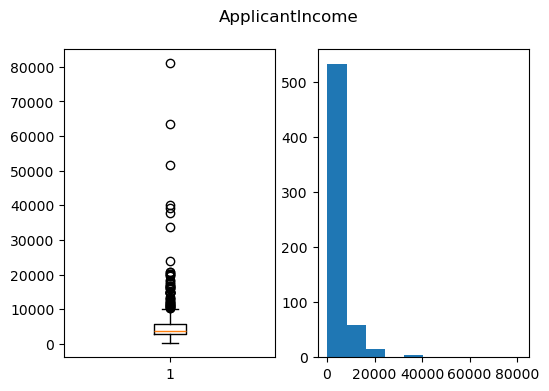

C:\Users\rushi\AppData\Local\Temp\ipykernel_20852\113822006.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3812.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()


None
---------------------------------------------------------------------------------
Percentage of outliers in CoapplicantIncome 2.9315960912052117


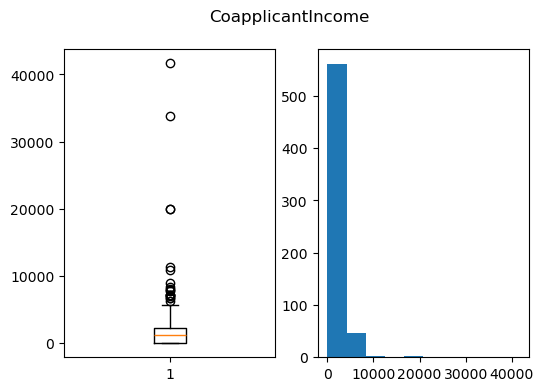

None
---------------------------------------------------------------------------------
Percentage of outliers in LoanAmount 8.957654723127035


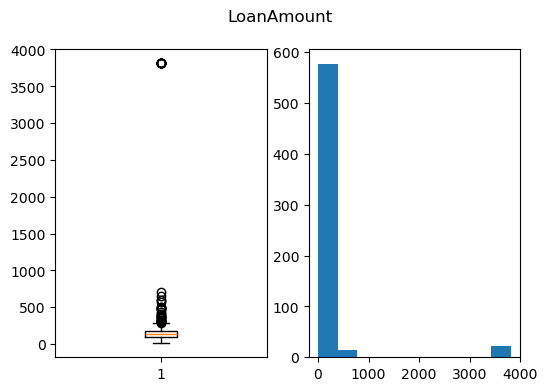

None
---------------------------------------------------------------------------------
Percentage of outliers in Loan_Amount_Term 16.612377850162865


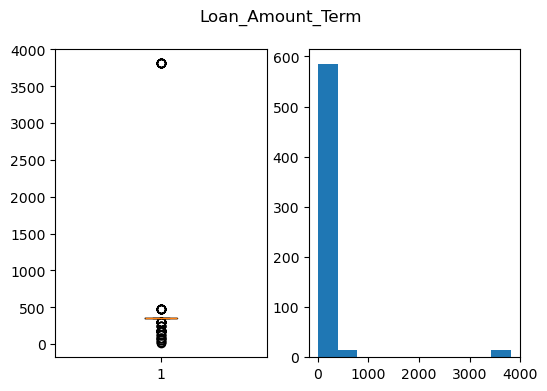

None
---------------------------------------------------------------------------------
Percentage of outliers in Credit_History 22.63843648208469


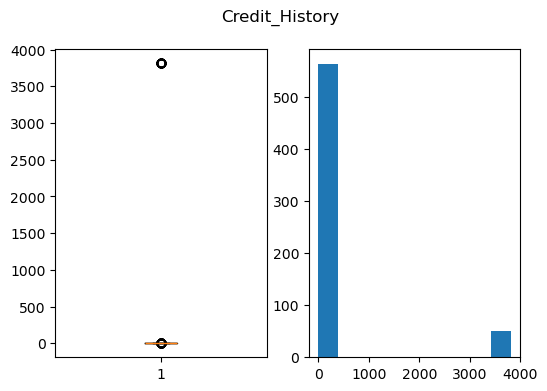

None
---------------------------------------------------------------------------------


In [180]:
for col in num:
    print(outlier_detection_treatment(col))
    print("---------------------------------------------------------------------------------")

<Axes: >

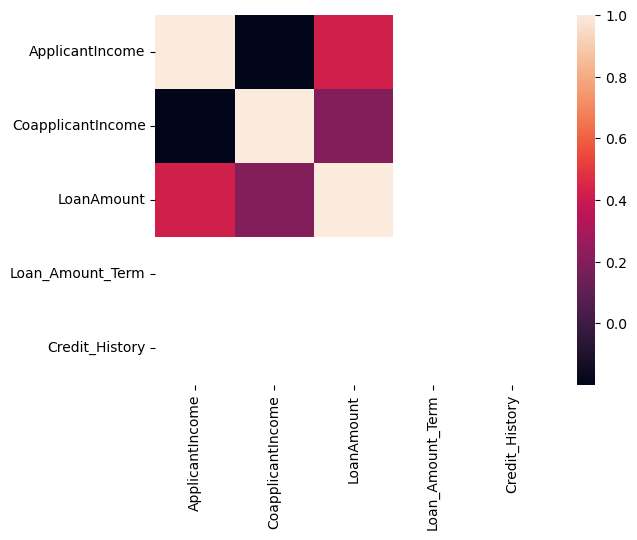

In [181]:
sns.heatmap(df.loc[:, num].corr())

In [182]:
num=[]
for i in df.columns:
    if (df[i].dtype=='int') or (df[i].dtype=='float'):
        num.append(i)

In [183]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [184]:
# Convert the 'Gender' column to strings
df['Gender'] = df['Gender'].astype(str)
df['Married'] = df['Married'].astype(str)
df['Dependents'] = df['Dependents'].astype(str)
df['Education'] = df['Education'].astype(str)
df['Self_Employed'] = df['Self_Employed'].astype(str)

In [185]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [186]:
Loan_Status= LabelEncoder()

In [187]:
df['Loan_Status']= Loan_Status.fit_transform(df['Loan_Status'])

In [188]:
Gender= OneHotEncoder(sparse_output= False)
Married = OneHotEncoder(sparse_output= False)
Dependents =  OneHotEncoder(sparse_output= False)
Education =  OneHotEncoder(sparse_output= False)
Self_Employed =  OneHotEncoder(sparse_output= False)

In [189]:
Gen_ohe= Gender.fit_transform(df[['Gender']])
Mar_ohe= Married.fit_transform(df[['Married']])
Dep_ohe= Dependents.fit_transform(df[['Dependents']])
Educ_ohe= Education.fit_transform(df[['Education']])
Self_Em_ohe= Self_Employed.fit_transform(df[['Self_Employed']])

In [190]:
df_Gen= pd.DataFrame(Gen_ohe, columns= Gender.categories_)
df_Gen= df_Gen.iloc[:,1:]
df_Gen

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
609,1.0,0.0
610,0.0,1.0
611,0.0,1.0
612,0.0,1.0


In [191]:
df_Mar= pd.DataFrame(Mar_ohe, columns= Married.categories_)
df_Mar= df_Mar.iloc[:,1:]
df_Mar

,No,Yes
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
609,1.0,0.0
610,0.0,1.0
611,0.0,1.0
612,0.0,1.0


In [192]:
df_Dep= pd.DataFrame(Dep_ohe, columns= Dependents.categories_)
df_Dep= df_Dep.iloc[:,1:]
df_Dep

,1,2,3+,3812.5
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
609,0.0,0.0,0.0,0.0
610,0.0,0.0,1.0,0.0
611,1.0,0.0,0.0,0.0
612,0.0,1.0,0.0,0.0


In [193]:
df_Educ= pd.DataFrame(Educ_ohe, columns= Education.categories_)
df_Educ= df_Educ.iloc[:,1:]
df_Educ

,Not Graduate
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
609,0.0
610,0.0
611,0.0
612,0.0


In [194]:
df_Self_Em= pd.DataFrame(Self_Em_ohe, columns= Self_Employed.categories_)
df_Self_Em= df_Self_Em.iloc[:,1:]
df_Self_Em

,No,Yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
609,1.0,0.0
610,1.0,0.0
611,1.0,0.0
612,1.0,0.0


In [195]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [196]:
df['Property_Area'].replace(to_replace = ['Urban', 'Semiurban', 'Rural'], value = [2, 1, 0], inplace = True)

In [197]:
df['Loan_Status'].replace(to_replace = ['No', 'Yes'], value= [0, 1], inplace = True)

In [198]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [199]:
X= df.drop(['Loan_ID', 'Gender', 'Married', 'Education','Self_Employed','Dependents', 'Loan_Status'], axis= 1)
y= df['Loan_Status']

In [200]:
X= pd.concat([X, df_Gen, df_Mar, df_Dep, df_Educ, df_Self_Em ], axis=1)

In [201]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,"(Female,)","(Male,)","(No,)","(Yes,)","(1,)","(2,)","(3+,)","(3812.5,)","(Not Graduate,)","(No,)","(Yes,)"
0,5849.0,0.0,129.0,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4583.0,1508.0,128.0,360.0,1.0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000.0,0.0,66.0,360.0,1.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,6000.0,0.0,141.0,360.0,1.0,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
610,4106.0,0.0,40.0,360.0,1.0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
611,8072.0,240.0,253.0,360.0,1.0,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
612,7583.0,0.0,187.0,360.0,1.0,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [202]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [203]:
X= X.values
y= y.values

In [204]:
X.shape

(614, 17)

In [205]:
y.shape

(614,)

In [206]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train,y_test= train_test_split(X,y, test_size= 0.3, random_state= 0)

In [207]:
X_train.shape

(429, 17)

In [208]:
y_train.shape

(429,)

In [209]:
X_test.shape

(185, 17)

In [210]:
y_test.shape

(185,)

## LOGISTIC REGRESSION 

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
lr= LogisticRegression()

In [213]:
lr.fit(X_train, y_train)

C:\Users\rushi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [214]:
lr_pred_train= lr.predict(X_train)

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [216]:
print(confusion_matrix(y_train, lr_pred_train))

[[  7 134]
 [  8 280]]


In [217]:
print(accuracy_score(y_train, lr_pred_train))

0.668997668997669


In [218]:
lr_pred_test= lr.predict(X_test)

In [219]:
print(accuracy_score(y_test, lr_pred_test))

0.7027027027027027


## support vector machine 


In [233]:
from sklearn.svm import SVC

In [234]:
scv= SVC()

In [235]:
scv.fit(X_train, y_train)

SVC()

In [236]:
svc_train_pred= scv.predict(X_train)

In [237]:
accuracy_score(y_train,svc_train_pred )

0.6713286713286714

In [238]:
svc_test_pred= scv.predict(X_test)

In [239]:
accuracy_score(y_test,svc_test_pred )

0.7243243243243244

## RANDOM FOREST

In [240]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
rf = RandomForestClassifier(max_depth = 20)

In [242]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [243]:
rf_train_pred = rf.predict(X_train)

In [244]:
accuracy_score(y_train, rf_train_pred)

0.9976689976689976

In [245]:
rf_test_pred = rf.predict(X_test)

In [246]:
accuracy_score(y_test, rf_test_pred)

0.6702702702702703

## DECISION TREE


In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dt= DecisionTreeClassifier(max_depth=15)

In [249]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [250]:
y_pred_train= dt.predict(X_train)

In [251]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [252]:
print(confusion_matrix(y_train, y_pred_train))

[[134   7]
 [  2 286]]


In [253]:
print(accuracy_score(y_train, y_pred_train))

0.9790209790209791


In [254]:
y_pred_test= dt.predict(X_test)

In [255]:
print(confusion_matrix(y_test, y_pred_test))

[[13 38]
 [35 99]]


In [256]:
print(accuracy_score(y_test, y_pred_test))

0.6054054054054054


In [257]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define your model and parameters
model = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train, y_train)  # Ensure the model is fit

# Predictions
dt_grid_pred_train = gridsearch.predict(X_train)

# Accuracy score
print(accuracy_score(y_train, dt_grid_pred_train))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.7365967365967366


In [270]:
dt_grid_pred_test= gridsearch.predict(X_test)
print(accuracy_score(y_test, dt_grid_pred_test))

0.6864864864864865


In [259]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [260]:
dt.predict_proba(X_train)

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [261]:
prob=dt.predict_proba(X_train)[:,1]

In [262]:
prob

array([0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.53333333, 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.53333333,
       1.        , 1.        , 0.53333333, 1.        , 1.        ,
       0.        , 0.        , 0.33333333, 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.53333333, 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.     

In [263]:
prediction= (prob>=0.9).astype(int)

In [264]:
prediction

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [265]:
accuracy_score(y_train,prediction )

0.9766899766899767